In [2]:
import pyemma

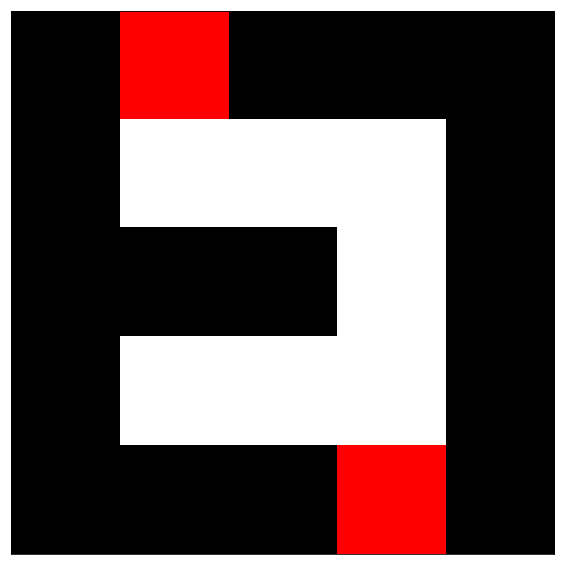

5.0


In [83]:
import numpy
from numpy.random import random_integers as randint
import matplotlib as mpl
import matplotlib.pyplot as pyplot
import random
from fractions import Fraction
import warnings

# Beautify
warnings.filterwarnings("ignore", category=DeprecationWarning)

def maze(width=50, height=50, complexity=.75, density=.75):

    # Limit to odd dimensions
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)

    # Sections
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2)))

    # Fill maze with walls
    Z = numpy.zeros(shape, dtype=float)

    # Set borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1

    # Generate pathways
    for i in range(density):
        x, y = randint(0, shape[1] // 2) * 2, randint(0, shape[0] // 2) * 2
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[randint(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_

    # Set start
    while True:
        x = randint(1, height - 1)
        if Z[1, x] == 0:
            Z[0, x] = 0.5
            break

    # Set exit
    while True:
        x = randint(1, width - 1)
        if Z[height - 1, x] == 0:
            Z[height, x] = 0.5
            break
    return Z

# Generate the maze
dimension = 5
if dimension == 1:
    dimension = 3
if dimension % 2 != 0:dimension -=1
width = height = dimension
Z = maze(width,height)

# Draw the maze'
cmap = mpl.colors.ListedColormap(['white', 'red', 'black'])
figureSize = 10
pyplot.figure(figsize=(figureSize, figureSize))
pyplot.imshow(Z, cmap=cmap, interpolation='none')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()

# Set start and exit as white
for x in range(width + 1):
    for y in range(height + 1):
        if Z[y, x] == 0.5: Z[y, x] = 0
M=Z
print(numpy.sqrt(M.size))
a=numpy.sqrt(M.size)
width = height = a.astype(numpy.int64)

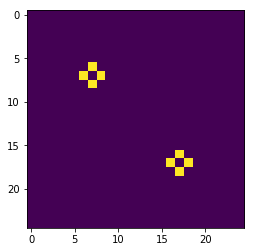

In [84]:
s=(height*width,width*height)
T=numpy.ones(s)

for i in range(width):
    for j in range(height):
        if M[i][j] == 1:
            for m in range(s[0]):
                for n in range(s[1]):
                    T[i*width+j][n]=0
                    T[m][i*width+j]=0
                    modm= m % 2
                    modn= n % 2
                    if modm==modn:
                        T[m][n]=0
    

for m in range(s[0]):
    for n in range(s[1]):
        if  abs(m-n)!=1:
            T[m][n]=0
plt.imshow(T)

5


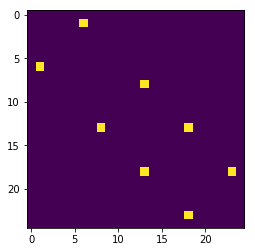

In [85]:
s=(height*width,width*height)
G=numpy.ones(s)

for i in range(width):
    for j in range(height):
        if M[i][j] == 1:
            for m in range(s[0]):
                for n in range(s[1]):
                    G[i*width+j][n]=0
                    G[m][i*width+j]=0
                    modm= m % 2
                    modn= n % 2
                    if modm==modn:
                        G[m][n]=0
    

for m in range(s[0]):
    for n in range(s[1]):
        if  abs(m-n)!=numpy.sqrt(height*width):
            G[m][n]=0
plt.imshow(G)
print(height)

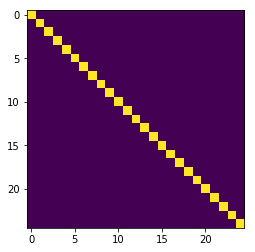

In [86]:
O=numpy.zeros(s)
for m in range(s[0]):
    for n in range(s[1]):
        if m==n:
            O[m][n]=1
plt.imshow(O)

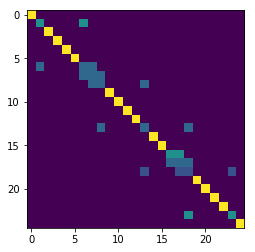

In [145]:
P=T+G+O
for row in range(P.shape[0]):
    P[row] /= numpy.sum(P[row])
P=numpy.nan_to_num(P)
plt.imshow(P)
#print(P.sum(axis=1))

In [146]:
import msmtools

In [147]:
msm = pyemma.msm.markov_model(msmtools.estimation.largest_connected_submatrix(P))
keptindices = msmtools.estimation.largest_connected_set(P)

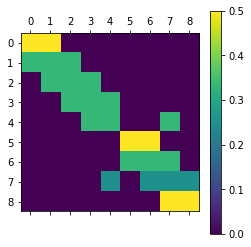

In [148]:
plt.matshow(msmtools.estimation.largest_connected_submatrix(P))
plt.colorbar()